In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# PS 05
David Gao
## 1 When will we see BOE
#### 1.1 

In [2]:
temp = pd.read_csv(r"ice-extent.csv", sep="\t")
temp.head(5)

,year,month,data-type,region,extent,area,time
0,1978,11,Goddard,N,11.65,9.04,1978.875000
1,1978,11,Goddard,S,15.90,11.69,1978.875000
2,1978,12,Goddard,N,13.67,10.90,1978.958333
3,1978,12,Goddard,S,10.40,6.97,1978.958333
4,1979,1,Goddard,N,15.41,12.41,1979.041667


In [3]:
# missing values in extent is marked as -9999, eliminating missing data in
# extent and area
SOE = temp[~(temp.extent == -9999) | ~(temp.area == -9999)]
SOE.head(5)

,year,month,data-type,region,extent,area,time
0,1978,11,Goddard,N,11.65,9.04,1978.875000
1,1978,11,Goddard,S,15.90,11.69,1978.875000
2,1978,12,Goddard,N,13.67,10.90,1978.958333
3,1978,12,Goddard,S,10.40,6.97,1978.958333
4,1979,1,Goddard,N,15.41,12.41,1979.041667


#### 1.2

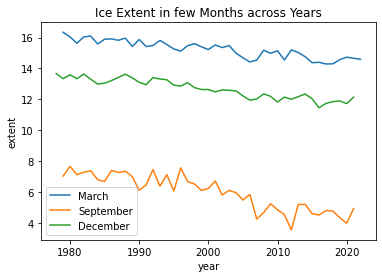

In [4]:
_ = sns.lineplot(x = SOE[(SOE.month == 3) & (SOE.region == "N")].year,
                 y = SOE[(SOE.month == 3) & (SOE.region == "N")].extent,
                 label = "March")
_ = sns.lineplot(x = SOE[(SOE.month == 9) & (SOE.region == "N")].year,
                 y = SOE[(SOE.month == 9) & (SOE.region == "N")].extent,
                 label = "September")
_ = sns.lineplot(x = SOE[(SOE.month == 12) & (SOE.region == "N")].year,
                 y = SOE[(SOE.month == 12) & (SOE.region == "N")].extent,
                 label = "December")
_ = plt.title("Ice Extent in few Months across Years")
_ = plt.legend()
_ = plt.show()

March has the highest ice cover percentate and September has the lowest ice cover percentage on average over years.
#### 1.3

In [5]:
# copy data from September
september = SOE[(SOE.month == 9) & (SOE.region == "N")].copy()
# record year as 2000 centered
september["year2000"] = september.year - 2000
# find slope and intercept
m = smf.ols("extent ~ year2000", data = september).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sat, 14 May 2022   Prob (F-statistic):           1.38e-15
Time:                        01:31:39   Log-Likelihood:                -32.490
No. Observations:                  43   AIC:                             68.98
Df Residuals:                      41   BIC:                             72.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9942      0.080     74.510      0.000       5.832       6.157
year2000      -0.0811      0.006    -12.515      0.000      -0.094      -0.068
==============================================================================
Omnibus:                        2.538   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                1.495
Skew:                          -0.321   Prob(JB):                        0.474
Kurtosis:                       3.649   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# slope and intercept for absolute years.
m = smf.ols("extent ~ year", data = september).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sat, 14 May 2022   Prob (F-statistic):           1.38e-15
Time:                        01:31:39   Log-Likelihood:                -32.490
No. Observations:                  43   AIC:                             68.98
Df Residuals:                      41   BIC:                             72.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    168.2503     12.966     12.977      0.000     142.066     194.435
year          -0.0811      0.006    -12.515      0.000      -0.094      -0.068
==============================================================================
Omnibus:                        2.538   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                1.495
Skew:                          -0.321   Prob(JB):                        0.474
Kurtosis:                       3.649   Cond. No.                     3.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The slope is -0.0811, and the intercept is 5.9942 for relative years centered at 2000, and the intercept is 168.2503 for normal years.
#### 1.4

The slope means for each year, the ice extent is decreaced by 0.0811 percentage approximately.\
And it is statistically significant as P value correponds to slope is less than 0.05.
#### 1.5
#### (a)
The intercept means the ice extent at year 0, should be 1 BC or AD 1.
#### (b)
The intercept means the ice extent at year 2000.\
 \
And the intercepts in both type of years are statistically significant as P value is less than 0.05.
#### 1.6

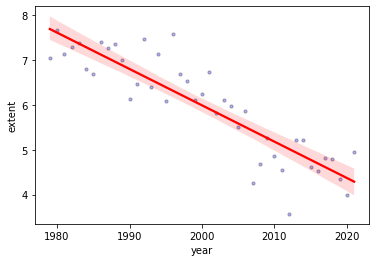

In [7]:
sns.regplot(y = "extent", x = "year",
scatter_kws = {"color":"blue", "alpha":0.3, "s": 10, "edgecolor":"black"},
line_kws={"color":"red"},
data=september);

The trend is ice extent is decreasing as year increasing, and the change rate seems to be stable without acceleration or deceleration.
#### 1.7

In [8]:
(-168.2503)/(-0.0811) # estimate using normal year

2074.6029593094945

In [9]:
(-168.2503 + 12.966)/(-0.0811 + 0.006) # estimate using normal year (added error)

2067.700399467377

The BOE will take place in year between 2074 and 2075 approximately, and between year 2067 and 2068 if error included, estimated from the model $y_i = 168.23 - 0.0811 x_i$ ( y for ice extent and x for year ).
#### 1.8

In [10]:
# copy data from September
march = SOE[(SOE.month == 3) & (SOE.region == "N")].copy()
# record year as 2000 centered
march["year2000"] = march.year - 2000
# find slope and intercept
m = smf.ols("extent ~ year2000", data = march).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     167.3
Date:                Sat, 14 May 2022   Prob (F-statistic):           3.05e-16
Time:                        01:31:39   Log-Likelihood:                -1.2556
No. Observations:                  44   AIC:                             6.511
Df Residuals:                      42   BIC:                             10.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2618      0.038    396.954      0.000      15.184      15.339
year2000      -0.0391      0.003    -12.936      0.000      -0.045      -0.033
==============================================================================
Omnibus:                        4.161   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                2.890
Skew:                          -0.463   Prob(JB):                        0.236
Kurtosis:                       2.152   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# slope and intercept for absolute years.
m = smf.ols("extent ~ year", data = march).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 extent   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     167.3
Date:                Sat, 14 May 2022   Prob (F-statistic):           3.05e-16
Time:                        01:31:39   Log-Likelihood:                -1.2556
No. Observations:                  44   AIC:                             6.511
Df Residuals:                      42   BIC:                             10.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     93.5367      6.052     15.454      0.000      81.322     105.751
year          -0.0391      0.003    -12.936      0.000      -0.045      -0.033
==============================================================================
Omnibus:                        4.161   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                2.890
Skew:                          -0.463   Prob(JB):                        0.236
Kurtosis:                       2.152   Cond. No.                     3.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
(-93.5367)/(-0.0391) # estimate using normal year

2392.2429667519177

The slope is -0.0391, and the intercept is 15.2618for relative years centered at 2000, and the intercept is 93.5367 for normal years.

In [13]:
(-93.5367 + 6.052)/(-0.0391 + 0.003) # estimate using normal year (added error)

2423.398891966759

The BOE will take place in year between 2392 and 2393 approximately, and between year 2423 and 2424 if error included, estimated from the model $y_i = -93.5367 - 0.0391 x_i$ ( y for ice extent and x for year ).

## 2 How Is Basketball Game Score Calculated
#### 2.1

In [14]:
temp = pd.read_csv(r"harden-21-22.csv", sep=",")
temp.head(5)

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2021-10-19,32-054,BRK,@,MIL,L (-23),1,30:38,...,5,8,8,1,2,4,3,20,17.6,-20
1,2,2.0,2021-10-22,32-057,BRK,@,PHI,W (+5),1,38:25,...,6,7,8,2,0,5,0,20,15.6,-1
2,3,3.0,2021-10-24,32-059,BRK,NaN,CHO,L (-16),1,33:09,...,5,7,8,1,1,8,5,15,6.4,-15
3,4,4.0,2021-10-25,32-060,BRK,NaN,WAS,W (+14),1,30:25,...,5,6,9,1,1,2,1,14,11.9,+6
4,5,5.0,2021-10-27,32-062,BRK,NaN,MIA,L (-13),1,35:36,...,7,7,7,1,1,4,3,14,10.7,-12


In [15]:
temp.isna().sum()

Rk             0
G             18
Date           0
Age            0
Tm             0
Unnamed: 5    41
Opp            0
Unnamed: 7     0
GS             0
MP             0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            0
FT             0
FTA            0
FT%            1
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
GmSc           0
+/-            0
dtype: int64

In [16]:
# NaN in G column are missing data, which is game harden did not play
harden = temp[~temp.G.isna()]
harden.head(5)

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2021-10-19,32-054,BRK,@,MIL,L (-23),1,30:38,...,5,8,8,1,2,4,3,20,17.6,-20
1,2,2.0,2021-10-22,32-057,BRK,@,PHI,W (+5),1,38:25,...,6,7,8,2,0,5,0,20,15.6,-1
2,3,3.0,2021-10-24,32-059,BRK,NaN,CHO,L (-16),1,33:09,...,5,7,8,1,1,8,5,15,6.4,-15
3,4,4.0,2021-10-25,32-060,BRK,NaN,WAS,W (+14),1,30:25,...,5,6,9,1,1,2,1,14,11.9,+6
4,5,5.0,2021-10-27,32-062,BRK,NaN,MIA,L (-13),1,35:36,...,7,7,7,1,1,4,3,14,10.7,-12


#### 2.2

In [17]:
rows,columns = harden.shape
rows

65

Harden played 65 games in this season.
#### 2.3

In [18]:
harden.dtypes

Rk              int64
G             float64
Date           object
Age            object
Tm             object
Unnamed: 5     object
Opp            object
Unnamed: 7     object
GS             object
MP             object
FG             object
FGA            object
FG%            object
3P             object
3PA            object
3P%            object
FT             object
FTA            object
FT%            object
ORB            object
DRB            object
TRB            object
AST            object
STL            object
BLK            object
TOV            object
PF             object
PTS            object
GmSc           object
+/-            object
dtype: object

In [19]:
harden = harden[["GmSc", "FG", "FGA", "3P", "3PA", "FT", "FTA", "ORB",
                 "DRB", "AST", "STL", "BLK", "TOV", "PF"]]
harden = harden.apply(pd.to_numeric)
harden.dtypes

GmSc    float64
FG        int64
FGA       int64
3P        int64
3PA       int64
FT        int64
FTA       int64
ORB       int64
DRB       int64
AST       int64
STL       int64
BLK       int64
TOV       int64
PF        int64
dtype: object

#### 2.4

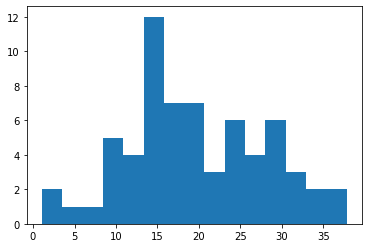

In [28]:
plt.hist(harden.GmSc, bins = 15)
plt.show()

In [29]:
GmSc_range = harden.GmSc.max() - harden.GmSc.min()
GmSc_mean = harden.GmSc.mean()
GmSc_std = harden.GmSc.std()
print("The histograph of GmSc looks kind of like normal distribution but,"
      "kind of skew to right, the range is", GmSc_range, ", the mean is", 
      GmSc_mean, ", and the standard deviation is", GmSc_std, ".")

The histograph of GmSc looks kind of like normal distribution but,kind of skew to right, the range is 36.699999999999996 , the mean is 19.61384615384615 , and the standard deviation is 8.232517023271894 .


#### 2.5

In [22]:
m = smf.ols("GmSc ~ FGA", data = harden).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     9.678
Date:                Sat, 14 May 2022   Prob (F-statistic):            0.00280
Time:                        01:32:06   Log-Likelihood:                -224.11
No. Observations:                  65   AIC:                             452.2
Df Residuals:                      63   BIC:                             456.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8748      3.582      2.477      0.016       1.716      16.034
FGA            0.7037      0.226      3.111      0.003       0.252       1.156
==============================================================================
Omnibus:                        0.246   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.198
Skew:                          -0.127   Prob(JB):                        0.906
Kurtosis:                       2.905   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (a)
The intercept is the expected game score when FGA is 0.
#### (b)
The interpretation is 1 unit increase in FGA will lead to 0.7037 points increase in game score. And it is statistically significant as p value is 0.003 and smaller than 0.05.
#### 2.6

In [23]:
m = smf.ols("GmSc ~ FG + FGA", data = harden).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     45.30
Date:                Sat, 14 May 2022   Prob (F-statistic):           7.49e-13
Time:                        01:32:09   Log-Likelihood:                -199.48
No. Observations:                  65   AIC:                             405.0
Df Residuals:                      62   BIC:                             411.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.9917      2.472      3.637      0.001       4.049      13.934
FG             3.0427      0.363      8.383      0.000       2.317       3.768
FGA           -0.5523      0.216     -2.553      0.013      -0.985      -0.120
==============================================================================
Omnibus:                        0.422   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.069
Skew:                          -0.025   Prob(JB):                        0.966
Kurtosis:                       3.151   Cond. No.                         64.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (a)
The coefficient of FG means 1 unit increase in FG will lead to 3.0427 points increase in game score while FGA stays the same. And it is statistically significant as p value is less than 0.05.
#### (b)
The coefficient of FGA means 1 unit increase in FGA will lead to 0.5523 points decrease in game score while FG stays the same. And it is statistically significant as p value is less than 0.05.
#### (c)
For model 1, more attempts some kind means more possibility to get the balls into the basket and get points, thus the relation between game score and field goal attempt is positive.\
However, in model 2, we have situation where attempts are made, but did not success, which means as the FGA increaces, the GmSc stays the same, thus the relation become negative.
#### (d)
The $R^2$ is 0.59 , which is alot higher than the 0.13 from model 1. This means model 2 has higher accuracy in predicting data than model 1. 

#### 2.7

In [24]:
harden = harden.rename({"3P": "three_P"}, axis = 1)
harden = harden.rename({"3PA": "three_PA"}, axis = 1)
m = smf.ols("GmSc ~ FG+FGA+three_P+three_PA+FT+FTA+ORB+DRB+AST+STL+BLK+TOV+PF", 
            data = harden).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.998e+30
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        01:32:13   Log-Likelihood:                 2007.5
No. Observations:                  65   AIC:                            -3987.
Df Residuals:                      51   BIC:                            -3957.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    3.02e-14    9.3e-15      3.249      0.002    1.15e-14    4.89e-14
FG             2.4000   9.09e-16   2.64e+15      0.000       2.400       2.400
FGA           -0.7000   6.01e-16  -1.17e+15      0.000      -0.700      -0.700
three_P        1.0000   1.56e-15   6.42e+14      0.000       1.000       1.000
three_PA   -1.193e-15   1.02e-15     -1.167      0.249   -3.25e-15    8.59e-16
FT             1.4000   1.73e-15   8.07e+14      0.000       1.400       1.400
FTA           -0.4000   1.43e-15  -2.79e+14      0.000      -0.400      -0.400
ORB            0.7000   1.31e-15   5.36e+14      0.000       0.700       0.700
DRB            0.3000   6.16e-16   4.87e+14      0.000       0.300       0.300
AST            0.7000   4.96e-16   1.41e+15      0.000       0.700       0.700
STL            1.0000   1.41e-15   7.08e+14      0.000       1.000       1.000
BLK            0.7000   1.99e-15   3.51e+14      0.000       0.700       0.700
TOV           -1.0000   8.34e-16   -1.2e+15      0.000      -1.000      -1.000
PF            -0.4000    1.1e-15  -3.65e+14      0.000      -0.400      -0.400
==============================================================================
Omnibus:                        1.045   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.593   Jarque-Bera (JB):                1.075
Skew:                          -0.196   Prob(JB):                        0.584
Kurtosis:                       2.507   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### (a)
The standard errors are small, and the absolute value of t values are very large.
#### (b)
The $R^2$ is 1, which means the result function of least square fits all datasets.
#### (c)
The coefficient for turnover is -1, which means 1 unit increase in turnover will lead to 1 point game score decrease, which is bad for the team.
#### 2.8
My result function from linear regression recover the same formula, as all the coefficients are almost the same, and the intercept is nearly 0.
## 3 Interpret regression result in the literature
#### 3.1
The people have a partner have better mental health, as the coefficient is negative, which means having partner will lead to decrease in PHQ-9 value. But it seems to be not statistically significant as p valud 0.150 is greater than 0.017.
#### 3.2
The COVID exposure has negarice effect on mental health, as the coefficient is positive, which means exposure to COVID will lead to increase in PHQ-9 value, thus representing lower mental health level. But it seems to be not statistically significant as p valud 0.129 is greater than 0.017.
#### 3.3
The Finacial distress has negarice effect on mental health, as the coefficient is positive, which means higher finacial distress will lead to increase in PHQ-9 value, thus representing lower mental health level. And it is statistically significant as p valud is smaller than 0.001 and smaller than 0.017.

I spent approximately 6 hours on this Problem Set.